In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from theano.printing import pydotprint
import pickle
sns.set_style("dark")
sns.set_context("notebook")

In [16]:
from keras.layers import Input, Dense
from keras.models import Model, Sequential
from keras import regularizers


In [17]:
net_input = Input(shape=(2,))
percetron  = Dense(8, activation='tanh', name='p1')(net_input)
percetron2 = Dense(3, activation='tanh', name='p2')(percetron)
out        = Dense(1, activation='tanh')(percetron2) 
xor = Model(input=net_input, output=out)
xor.compile(optimizer='adadelta', loss='binary_crossentropy')

In [18]:
with open('../data/xor.tuple', 'rb') as xtuple:
    x_train, y_train, x_test, y_test = pickle.load(xtuple)

In [12]:
history = xor.fit(x_train, y_train,
                verbose=0,
                nb_epoch=2000,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, y_test))

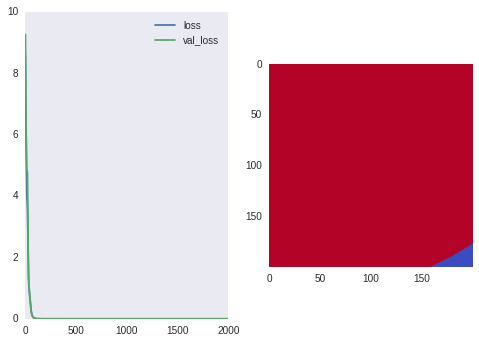

In [13]:
plt.subplot(121)
for key, data in history.history.items():
    plt.plot(data,label=key)
plt.legend(history.history.keys())

x = np.arange(-1,1,0.01)
y = np.arange(-1,1,0.01)
xx, yy = np.meshgrid(x,y)
# xx
x1 = xx.reshape(-1,1)
x2 = yy.reshape(-1,1)
z = xor.predict(np.concatenate((x1,x2),axis=1))
z = z.reshape(len(x),len(y))
plt.subplot(122)
plt.imshow(z,cmap='coolwarm')


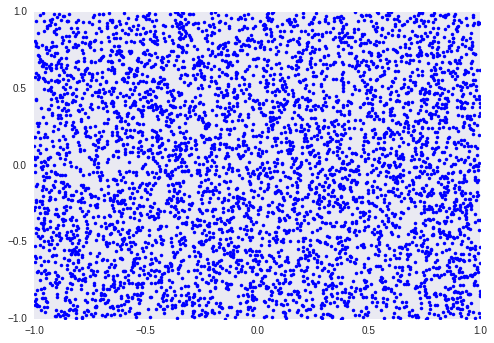

In [14]:
plt.plot(x_train[:, 0], x_train[:,1], '.b')

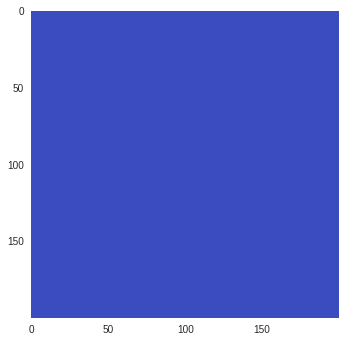

In [15]:
plt.imshow(z >= 0,cmap='coolwarm')

In [15]:
import pickle
with open('xor.keras', 'wb') as out:
    pickle.dump(xor,out)

In [16]:
with open('xor.keras' , 'rb') as kmodel:
    model = pickle.load(kmodel)

In [23]:
list(map(lambda w: len(w.shape),xor.get_weights()))

[2, 1, 2, 1, 2, 1]

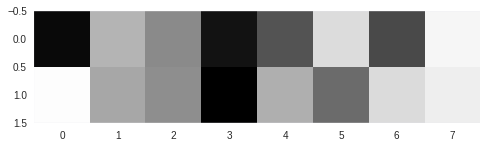

In [27]:
plt.imshow(model.get_weights()[0],interpolation='none')

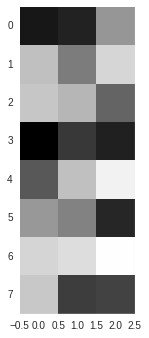

In [35]:
plt.imshow(model.get_weights()[2],interpolation='none')

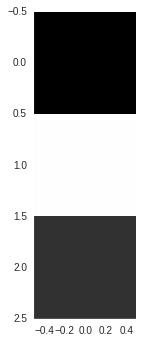

In [36]:
plt.imshow(model.get_weights()[4],interpolation='none')

In [32]:
line_data = np.array([[0,0],[10,0]],np.float32)

In [33]:
model.predict_generator()

(2, 2)

In [64]:
x_train = np.stack([[train] for train in x_train])
x_train

array([[[ 0.25605177,  0.09945316]],

       [[ 0.09038142,  0.73530157]],

       [[ 0.37323466, -0.95365933]],

       ..., 
       [[ 0.16260626,  0.02399319]],

       [[ 0.8690958 , -0.79675192]],

       [[-0.60360096, -0.89927752]]])

In [65]:
x_test = np.stack([[train] for train in x_test])
x_test

array([[[-0.79131411, -0.77976044]],

       [[ 0.04424915, -0.86545411]],

       [[-0.8366925 ,  0.30229779]],

       [[-0.79876331,  0.07151722]],

       [[ 0.064258  , -0.61246099]],

       [[-0.68370615,  0.24054863]],

       [[ 0.30467747, -0.9792534 ]],

       [[ 0.34419495, -0.51436667]],

       [[ 0.89061669, -0.5125816 ]],

       [[-0.81917936, -0.54223214]],

       [[ 0.51262548, -0.73442538]],

       [[-0.55279148, -0.74874001]],

       [[ 0.87135617, -0.98844479]],

       [[ 0.07811781,  0.28294731]],

       [[-0.92514646,  0.52117114]],

       [[ 0.30745261, -0.98113058]],

       [[-0.4584139 ,  0.01495633]],

       [[-0.93604015, -0.86965921]],

       [[ 0.17143382,  0.06401793]],

       [[ 0.22521283,  0.22937821]],

       [[-0.99782744,  0.10601103]],

       [[ 0.40924048, -0.17932446]],

       [[-0.52596952,  0.12039976]],

       [[-0.79382171, -0.02895413]],

       [[ 0.56068016, -0.25414911]],

       [[-0.10102168, -0.95941872]],

       [[-0.

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import LSTM

In [66]:
model = Sequential()
# model.add(Embedding(max_features, 256, input_length=maxlen))
model.add(LSTM(32, input_shape=(1,2)))
# model.add(LSTM()
# model.add(Dropout(0.5))
# model.add(LSTM(2, return_sequences=True))
# model.add(LSTM(32, return_sequences=False))
# model.add(Dropout(0.5))
# model.add(Dense(len(chars)))
# model.add(Activation('softmax'))
model.add(Dense(1))
model.add(Activation('softmax'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [60]:
model.predict(x_train).shape

(5000, 1)

In [67]:
history = model.fit(x_train, y_train,
                verbose=1,
                nb_epoch=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, y_test))

Train on 5000 samples, validate on 100 samples
Epoch 1/100
5000/5000 [==============================] - 0s - loss: 8.1115 - acc: 0.4912 - val_loss: 8.7683 - val_acc: 0.4500
Epoch 2/100
5000/5000 [==============================] - 0s - loss: 8.1115 - acc: 0.4912 - val_loss: 8.7683 - val_acc: 0.4500
Epoch 3/100
5000/5000 [==============================] - 0s - loss: 8.1115 - acc: 0.4912 - val_loss: 8.7683 - val_acc: 0.4500
Epoch 4/100
5000/5000 [==============================] - 0s - loss: 8.1115 - acc: 0.4912 - val_loss: 8.7683 - val_acc: 0.4500
Epoch 5/100
5000/5000 [==============================] - 0s - loss: 8.1115 - acc: 0.4912 - val_loss: 8.7683 - val_acc: 0.4500
Epoch 6/100
5000/5000 [==============================] - 0s - loss: 8.1115 - acc: 0.4912 - val_loss: 8.7683 - val_acc: 0.4500
Epoch 7/100
5000/5000 [==============================] - 0s - loss: 8.1115 - acc: 0.4912 - val_loss: 8.7683 - val_acc: 0.4500
Epoch 8/100
5000/5000 [==============================] - 0s - loss: 8.1

In [17]:
x_train.shape

(5000, 2)